In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv

In [2]:
!pwd

/content


In [3]:
!ls

happy_dog.jpg  sample_data


##Histogram Equalization Using CV

###Read Image

In [4]:
img = cv.imread('happy_dog.jpg', cv.IMREAD_GRAYSCALE)

###Show image using plt

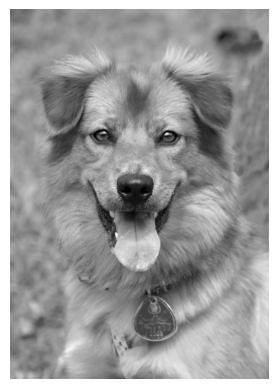

In [5]:
plt.imshow(img, cmap='gray')
plt.axis("off")
plt.show()

###Plot Image Histogram

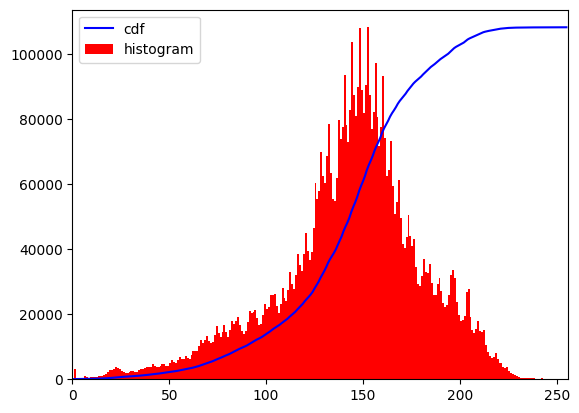

In [6]:
hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()

cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

###Equalized Image using equalizeHist Function

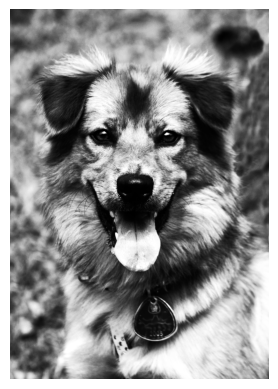

In [7]:
equ = cv.equalizeHist(img)

plt.imshow(equ, cmap='gray')
plt.axis("off")
plt.show()

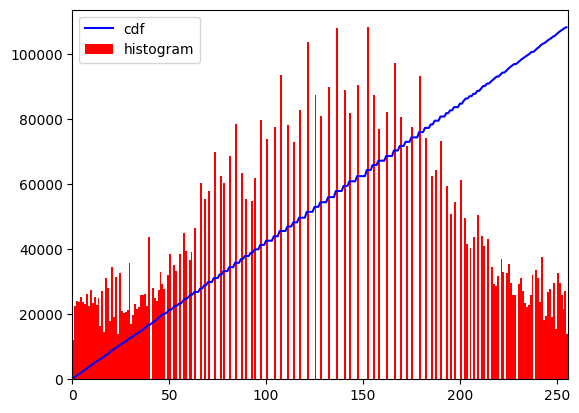

In [8]:
hist,bins = np.histogram(equ.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(equ.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()

###Concat Two Images and Show Them

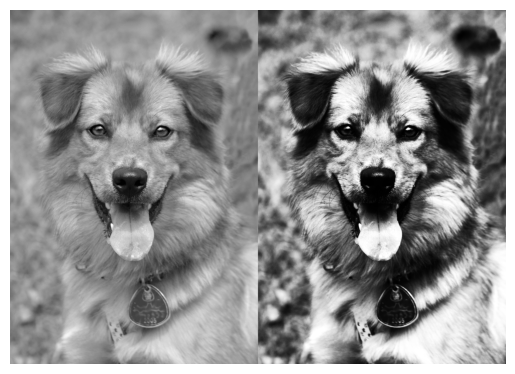

In [9]:
img = cv.imread('happy_dog.jpg',0)
equ = cv.equalizeHist(img)
res = np.hstack((img,equ)) #stacking images side-by-side
plt.imshow(res, cmap='gray')
plt.axis("off")
plt.show()


###Save Images

In [10]:
cv.imwrite('equ.png',equ)
cv.imwrite('res.png',res)

True

##Histogram Equalization Using Pillow

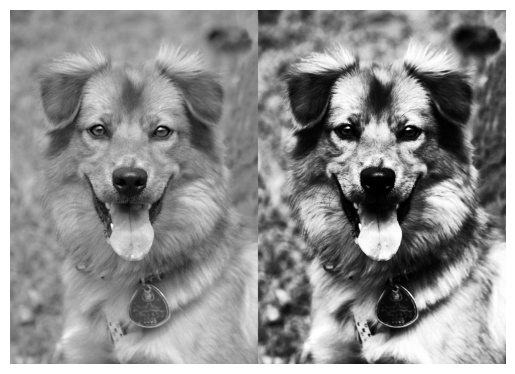

In [11]:
from PIL import Image, ImageOps

img1 = Image.open(r"happy_dog.jpg")
img2 = ImageOps.equalize(img1, mask = None)

res1 = np.hstack((img1,img2))
plt.imshow(res1)
plt.axis("off")
plt.show()